## Monte Carlo Integration

In [42]:
# Integrate e**x from 0 to 1 using Monte Carlo method
import numpy as np
import matplotlib.pyplot as plt

# Linear Congruential Generator (LCG) implementation
def lcg(seed, n, a=1664525, c=1013904223, m=2**32):
    """Generate n pseudo-random numbers using LCG."""
    numbers = []
    for _ in range(n):
        seed = (a * seed + c) % m
        numbers.append(seed / m)  # Normalize to [0, 1)
    return np.array(numbers)

# Generate random numbers using built-in RNG
def built_in_rng(seed, n):
    """Generate n pseudo-random numbers using built-in RNG."""
    np.random.seed(seed)

    return np.random.rand(n)

# Given function to integrate
def f(x):
    return np.exp(x)

def monte_carlo_integration(fx, a=0, b=1):
    """Estimate the integral using Monte Carlo method."""
    mean=  np.mean(fx)

    i = mean / (b - a)

    return i

#  Calculate the error of the integral estimate
def calculate_error(estimate, true_value):
    return abs(estimate - true_value)

#  Calculate the standard error of the estimate
def standard_error(fx):
    return np.std(fx) / np.sqrt(len(fx))

# Generate random numbers using LCG and built-in RNG
N = 1_000_000
x1 = lcg(seed=23456789, n=N)
x2 = built_in_rng(seed=23456789, n=N)

#  Calculate the function values for both sets of random numbers
f_x1 = f(x1)
f_x2 = f(x2)

#  print the generated random numbers and their function values
# print("Random numbers from LCG (x1):", x1)
# print("Function values for LCG (f(x1)):", f_x1)

# Integration is given by the mean value of f(x) over [0, 1]
integral_x1 = monte_carlo_integration(f_x1)
integral_x2 = monte_carlo_integration(f_x2)

print(f"Integral estimate using LCG: {integral_x1:.4f}")
print(f"Integral estimate using built-in RNG: {integral_x2:.4f}")

print(f"x1 (LCG): Mean = {np.mean(x1):.4f}, Std Dev = {np.std(x1):.4f}")
print(f"Mean of f(x1): {np.mean(f_x1):.4f}, Mean of f(x2): {np.mean(f_x2):.4f}")

# Display the error and standard error for both methods
true_value = np.exp(1) - 1  # True value of the integral
error_x1 = calculate_error(integral_x1, true_value)
error_x2 = calculate_error(integral_x2, true_value)
std_error_x1 = standard_error(f_x1)
std_error_x2 = standard_error(f_x2)

print(f"Error of integral estimate using LCG: {error_x1}")
print(f"Error of integral estimate using built-in RNG: {error_x2:.4f}")
print(f"Standard error of estimate using LCG: {std_error_x1}")
print(f"Standard error of estimate using built-in RNG: {std_error_x2:.4f}")

Integral estimate using LCG: 1.7189
Integral estimate using built-in RNG: 1.7187
x1 (LCG): Mean = 0.5004, Std Dev = 0.2887
Mean of f(x1): 1.7189, Mean of f(x2): 1.7187
Error of integral estimate using LCG: 0.0006515276037153406
Error of integral estimate using built-in RNG: 0.0004
Standard error of estimate using LCG: 0.0004920920718788389
Standard error of estimate using built-in RNG: 0.0005


In [43]:
import numpy as np

def monte_carlo_exp(N, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # Integration bounds
    a, b = 0.0, 1.0
    
    # Sample points
    x = np.random.uniform(a, b, N)
    fx = np.exp(x)
    
    # Monte Carlo estimate
    I_mc = np.mean(fx) / (b - a)
    
    # Exact value
    I_exact = 1 - np.exp(-1)
    
    # Errors
    abs_error = abs(I_mc - I_exact)
    
    # Standard error of Monte Carlo estimate
    std_error = (b - a) * np.std(fx, ddof=1) / np.sqrt(N)
    
    return I_mc, I_exact, abs_error, std_error


# Run for different sample sizes
Ns = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

for N in Ns:
    large_random_seed = np.random.randint(0, 1_000_000_000)
    I_mc, I_exact, abs_err, std_err = monte_carlo_exp(N, seed=large_random_seed)
    print(f"N = {N:6d} | Seed = {large_random_seed} | MC = {I_mc:.6f} | Abs Error = {abs_err:.6f} | Std Error = {std_err:.6f}")

N =    100 | Seed = 916294415 | MC = 1.692737 | Abs Error = 1.060616 | Std Error = 0.045393
N =   1000 | Seed = 982551600 | MC = 1.701430 | Abs Error = 1.069309 | Std Error = 0.015285
N =  10000 | Seed = 207447122 | MC = 1.718224 | Abs Error = 1.086104 | Std Error = 0.004908
N = 100000 | Seed = 899037467 | MC = 1.717461 | Abs Error = 1.085340 | Std Error = 0.001556
N = 1000000 | Seed = 250871520 | MC = 1.718455 | Abs Error = 1.086335 | Std Error = 0.000492
N = 10000000 | Seed = 445603844 | MC = 1.718580 | Abs Error = 1.086459 | Std Error = 0.000156
N = 100000000 | Seed = 634174182 | MC = 1.718270 | Abs Error = 1.086149 | Std Error = 0.000049


In [44]:
import random
import numpy as np
import math

# Exact integral
I_exact = 1 - math.exp(-1)

def mc_python_random(N, seed):
    random.seed(seed)
    samples = [math.exp(-random.uniform(0, 1)) for _ in range(N)]
    I_mc = sum(samples) / N
    std_err = np.std(samples, ddof=1) / math.sqrt(N)
    return I_mc, abs(I_mc - I_exact), std_err


def mc_numpy_random(N, seed):
    np.random.seed(seed)
    x = np.random.uniform(0.0, 1.0, N)
    fx = np.exp(-x)
    I_mc = np.mean(fx)
    std_err = np.std(fx, ddof=1) / math.sqrt(N)
    return I_mc, abs(I_mc - I_exact), std_err


# Parameters
N = 100_000
seed = 42

py_mc, py_err, py_std = mc_python_random(N, seed)
np_mc, np_err, np_std = mc_numpy_random(N, seed)

print("Python random:")
print(f"  MC estimate  = {py_mc:.8f}")
print(f"  Abs error    = {py_err:.8f}")
print(f"  Std error    = {py_std:.8f}")

print("\nNumPy random:")
print(f"  MC estimate  = {np_mc:.8f}")
print(f"  Abs error    = {np_err:.8f}")
print(f"  Std error    = {np_std:.8f}")

print("\nExact value:")
print(f"  I_exact      = {I_exact:.8f}")

Python random:
  MC estimate  = 0.63209854
  Abs error    = 0.00002202
  Std error    = 0.00057313

NumPy random:
  MC estimate  = 0.63238603
  Abs error    = 0.00026547
  Std error    = 0.00057198

Exact value:
  I_exact      = 0.63212056


## Estimation of Pie by Monte Carlo

In [45]:
def estimate_montecarlo(N: int, seed: int):
    counter = 0
    np.random.seed(seed)
    for n in range(N):
        x, y = np.random.random(2)
        sum_xy = x**2 + y**2
        if sum_xy <= 1:
            counter += 1

    estimate = (counter / N) * 4
    error = estimate - math.pi
    # print(f"Estimated π: {estimate:.6f}, Error: {error:.6f}")
    return estimate, error, N

estimate_montecarlo(N=10**6, seed=12345565)

(3.141124, -0.0004686535897930888, 1000000)

In [56]:
large_random_seed = 12345565
estimated_pis = [
    estimate_montecarlo(N=steps ,seed= math.ceil(np.random.random() * large_random_seed))
    for steps in range(100, 10000, 100)
]
estimated_pis = [[error, steps] for val, error, steps in estimated_pis]

In [57]:
error = [i[0] for i in estimated_pis]
steps = [i[1] for i in estimated_pis]

In [58]:
max(error), min(error)

(0.1384073464102067, -0.2295926535897932)

In [59]:
from IPython.core.display import HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

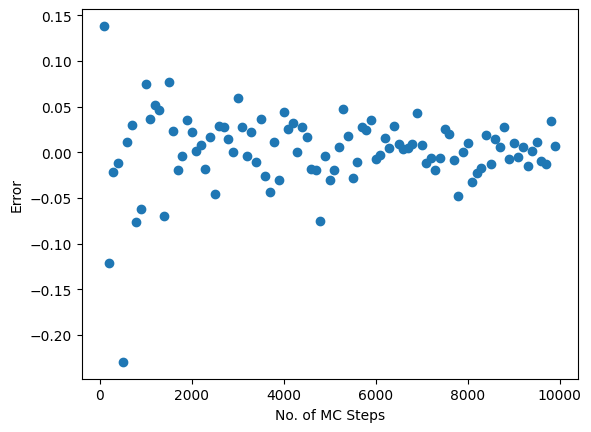

<Figure size 4000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(steps, error)
plt.xlabel("No. of MC Steps")
plt.ylabel("Error")
plt.xlim()
plt.ylim()
plt.figure(figsize=(40, 6))
plt.show()